Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


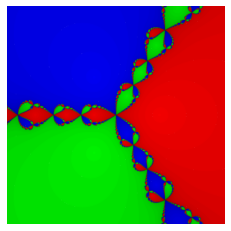

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


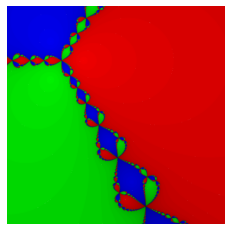

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


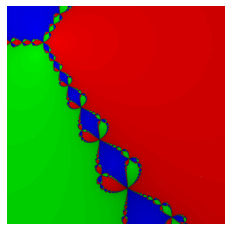

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


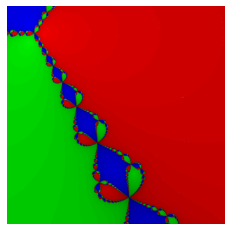

In [1]:
""" 
Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/
Z^3 - 1

"""
import math
import matplotlib.pyplot as plt
import numpy as np

def fcube(z):
    return z ** 3 - 1

def newton_set(width, height, zoom=1, x_off=0, y_off=0, niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    # drawing area
    xa, xb, ya, yb = -2.5, 2.5, -2.5, 2.5

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = complex(-0.5, math.sin(2*math.pi/3))
    r3 = complex(-0.5, -1*math.sin(2*math.pi/3))

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy = (y + y_off) * (yb - ya) / (zoom*(height - 1)) + ya

            for x in range(width):
                zx = (x + x_off) * (xb - xa) / (zoom*(width - 1)) + xa

                # Mapping real -> complex plane
                z = complex(zx, zy)
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = (fcube(z + complex(h, h)) - fcube(z)) / complex(h, h)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                    
                    znext = z - fcube(z) / dz # Newton iteration
                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[y,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[y,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r3)<=eps:
                    # color blue
                    pixels[y,x] = (0, 0, 255 - count*multcol)
 
    return pixels

def display(width=1024, height=1024, niter=1024, zoom=1, x_off=0, y_off=0):
    """ Display a newton-raphson fractal """

    pimg = newton_set(width, height, zoom=zoom, x_off=x_off, y_off=y_off, niter=niter)
    plt.axis('off') 
    plt.imshow(pimg)
    plt.show()

display(zoom=1, x_off=0, y_off=0)
display(zoom=1/2, x_off=-0, y_off=0)
display(zoom=1/3, x_off=-0, y_off=0)
display(zoom=1/4, x_off=-0, y_off=0)

## Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

Z region = ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


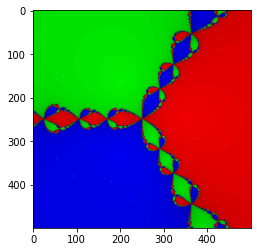

Z region = ( -5.0 , -5.0 ) to ( 5.0 , 5.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


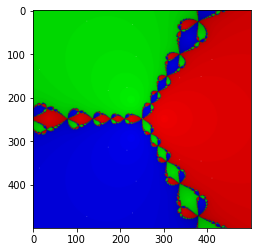

Z region = ( -7.5 , -7.5 ) to ( 7.5 , 7.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


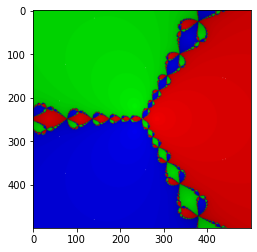

Z region = ( -10.0 , -10.0 ) to ( 10.0 , 10.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


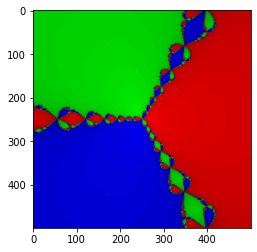

Z region = ( -12.5 , -12.5 ) to ( 12.5 , 12.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


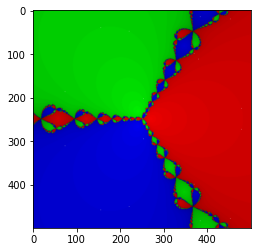

Z region = ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


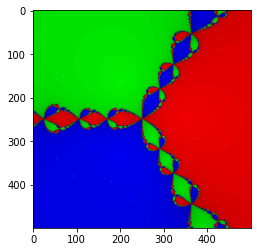

Z region = ( -1.25 , -1.25 ) to ( 1.25 , 1.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


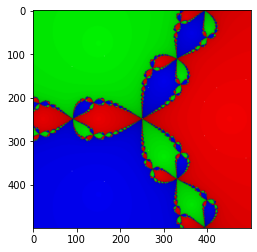

Z region = ( -0.8333333333333333 , -0.8333333333333333 ) to ( 0.8333333333333333 , 0.8333333333333333 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


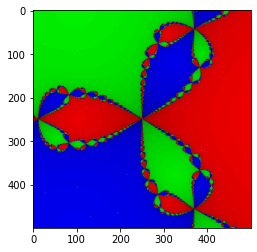

Z region = ( -0.625 , -0.625 ) to ( 0.625 , 0.625 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


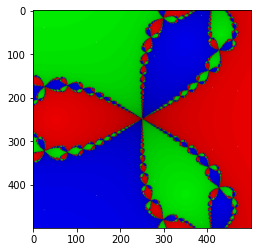

Z region = ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


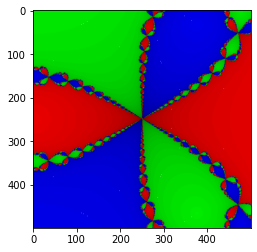

Z region = ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


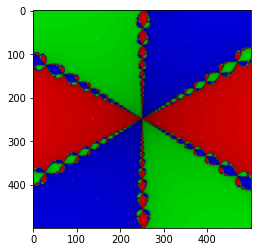

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

def fcube(z):
    return z ** 3 - 1

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = complex(-0.5, math.sin(2*math.pi/3))
    r3 = complex(-0.5, -1*math.sin(2*math.pi/3))

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = (fcube(z + complex(h, h)) - fcube(z)) / complex(h, h)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                    
                    znext = z - fcube(z) / dz # Newton iteration
                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r3)<=eps:
                    # color blue
                    pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
 
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region = (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.imshow(pimg)
    plt.show()

display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
